## Введение в анализ данных, ИАД-4

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): _Петросян Арина_

### Общая информация

__Дата выдачи:__ 05.03.2020

__Дедлайн:__ 19.03.2020 23:59

### О задании

В этом домашнем задании вы реализуете алгоритм kNN и линейную регрессию, попрактикуетесь в решении задачи регрессии, а также решите теоретические задачи.

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 18,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 18, а максимальное число дополнительных баллов, которые пойдут в бонус — 2. Бонусные задания отмечены звездочками (*).

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-4: zG1cIyT

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

# kNN своими руками (5)

В этом задании вам предстоит реализовать взвешенный алгоритм kNN для регрессии. Пусть необходимо вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

### Реализуйте две функции расстояния (1 балл)
- евклидова метрика **(0.5 балла)**
- метрика Манхэттена **(0.5 балла)**

Обе функции должны на вход получать матрицу `np.array of shape(n, m)` и вектор `np.array of shape(m,)`, а возвращать вектор расстояний от каждой строчки матрицы до вектора `np.array of shape(n,)`

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy.** 

In [1]:
import numpy as np

In [2]:
def euclidian_metric(X, x):
    distances = ((X - x) ** 2).sum(axis=1) ** 0.5
    return distances

def manhattan_metric(X, x):
    distances = abs(X - x).sum(axis=1)
    return distances

In [3]:
# проверка
X = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
y = np.ones(3)

assert np.allclose(euclidian_metric(X, y), np.array([ 2.23606798,  8.77496439, 13.92838828]))
assert np.allclose(manhattan_metric(X, y), np.array([ 3., 15., 24.]))

### Реализуйте алгоритм kNN для регрессии (4 балла)

- реализуйте класс kNN для равномерных весов (то есть $w_1 = \ldots = w_k$) **(3 балла)**
- добавьте возможность передать данному классу параметр `weights='distance'` для вызова взвешенной версии алгоритма kNN (то есть $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$ **(1 балл)**

In [4]:
class KNN:
    def __init__(self, metric='euclid', k=5, weights='uniform'):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """

        self.metric = metric
        self.k = k
        self.weights = weights
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        """

        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        y_pred = np.array([])
        
        for row in range(len(X_test)):
            if self.metric == 'euclid':
                dist = euclidian_metric(X_train, X_test[row])
            else:
                dist = manhattan_metric(X_train, X_test[row])
                
            indicies = []
            w = np.array([])
            i = 0

            while i != self.k:
                best_index = np.argmin(dist)
                w = np.append(w, 1 / dist.min())
                indicies.append(best_index)
                dist[best_index] = dist[np.argmax(dist)]
                i += 1
            
            a = self.y_train[indicies]
            weighted = a * w / np.sum(w)
            if self.weights == 'uniform': 
                label = np.mean(a)
            else:
                label = sum(weighted)
                
            y_pred = np.append(y_pred, label)


        return y_pred

Сверьте для нескольких комбинаций различных гиперпараметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn`. **Не забудьте про гиперпараметр `weights`.**

In [5]:
np.random.seed(13)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

p1 = KNN('euclid', 5,  'distance')
p1.fit(X_train, y_train)
y_pred = p1.predict(X_test)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5, weights='distance')
neigh.fit(X_train, y_train)
y = neigh.predict(X_test)

In [7]:
mean_squared_error(y_pred, y_test)

NameError: name 'mean_squared_error' is not defined

# Линейная регрессия своими руками (5)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

*Чему будет равен градиент этой функции по $w$? Вспомните, что за вектор $\hat{y}$ и как он зависит от $X$ и $w$.*

Эти ссылки могут показаться вам полезными:
- https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture02-linregr.pdf
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

### Реализуйте функцию потерь Хьюбера для одного примера и ее градиент по весам (1.5 балла)

- функция потерь **(0.5 балла)**
- градиент **(1 балл)**

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy. Однако можно использовать оператор if.**

In [9]:
def huber_loss(x, y, w, delta):
    """
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    loss - scalar
    """
    a = np.dot(x, w)
    if abs(y - a) <= delta:
        return 0.5 * (y - a) ** 2
    else:
        return delta * abs(y - a) - 0.5 * delta ** 2
    pass

def huber_grad(x, y, w, delta):
    """
    INPUT:
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    grad - np.array shape=(d,)
    """
    grad = np.array([])
    a = sum(x * w)
    l = len(w)
    if abs(y - a) <= delta:
        for i in range(l):
            part_deriv = (a - y) * x[i]
            grad = np.append(grad, part_deriv)
    else:
        for i in range(l):
            if y > a:
                part_deriv = delta * (-x[i])
            else:
                part_deriv = delta * (x[i]) 
            grad = np.append(grad, part_deriv)
    return grad
    pass

In [10]:
# проверка

x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 19
delta = 1

assert huber_loss(x, y, w, delta) == 29.5
assert np.allclose(huber_grad(x, y, w, delta), np.array([1, 2, 3]))

y = 49.2

assert np.allclose(huber_loss(x, y, w, delta), 0.02000000000000057)
assert np.allclose(huber_grad(x, y, w, delta), np.array([-0.2, -0.4, -0.6]))

### Реализуйте линейную регрессию (3.5 балла)

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [11]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent (learning rate)
        """

        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        
        В этой функции вы должны инициализировать веса (можно нулями), а также 
        итерационно обновлять веса с помощью 
        градиентного спуска (считать и запоминать лосс (значение функции потерь) будет хорошим решением)
        """
        loss_all = np.zeros((len(X), self.max_iter))
        w_all = np.zeros_like(X)
        
        for x in range(len(X)):
            w_x = np.zeros_like(X[x])
            loss_x = np.zeros(self.max_iter)
            m = X.shape[0]

            for i in range(self.max_iter):
                gradient_vector = huber_grad(X[x], y[x], w_x, self.delta)
                w_x -= (self.eta / m) * gradient_vector
                cost = huber_loss(X[x], y[x], w_x, self.delta)
                loss_x[i] += cost
                if np.sum(gradient_vector ** 2) <= self.tol:
                    break
            w_all[x] = w_x
            loss_all[x] = loss_x
            
        self.w = np.mean(w_all, axis=0)
        self.loss_history = np.sum(loss_all, axis=0)
        return self.loss_history
        
    def predict(self, X):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        
        Предскажите ответы с помощью обученных весов
        """
        
        y_pred = np.dot(X, self.w)
        
        return y_pred
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        
        Посчитайте градиент как среднее от градиентов для каждого примера
        """

        grad = np.zeros_like(self.w)

        grad = huber_grad(X, y, w, 2) / len(w)
        
        return grad 
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        
        Посчитайте loss по выборке как среднее loss'ов для каждого 
        примера
        """
        loss = 0
        loss = self.loss_history / len(X)
        # your code here
        
        return loss

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

In [12]:
lrh = LinearRegressionHuber(max_iter = 100)

In [13]:
loss_history = lrh.fit(X_train, y_train)

In [14]:
y_pred_lrh = lrh.predict(X_test)
y_pred_lrh# your code here

array([-3.37569657e-04,  1.24287542e-04,  1.09026576e-04, -3.74088726e-05,
        1.51676816e-04,  2.67801528e-04, -1.85712384e-05,  1.04373809e-04,
        6.78617668e-05, -1.25626861e-05, -8.80805233e-05,  1.16971023e-04,
       -5.40275043e-05,  3.43627419e-05, -2.81121624e-05, -1.19995585e-04,
       -3.28727065e-05,  1.84999317e-04, -1.13829575e-04,  1.74770777e-04,
       -1.61302002e-05,  1.31043804e-04,  4.34742848e-05, -1.88746948e-05,
        5.60433428e-05,  1.00191867e-04, -1.00761184e-04,  1.52598722e-04,
        1.41080945e-04, -1.65015539e-04,  2.38844570e-05, -3.20240629e-04,
       -6.40486624e-05, -2.35712173e-04,  1.14414252e-04,  1.54488003e-04,
       -4.28365004e-04,  6.22658051e-05,  2.42197073e-05, -1.28144105e-04,
       -3.06772660e-04,  1.26284410e-04, -2.25113987e-04,  5.94527813e-05,
        5.18287401e-05, -3.58352022e-04, -2.71613544e-04,  2.96180124e-05,
        2.76193415e-04, -1.73821857e-04, -1.08684791e-04, -1.97519947e-04,
        1.90793908e-04, -

In [15]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error

In [16]:
reg = HuberRegressor(alpha=1, max_iter=100, tol=1e-6)
reg.fit(X_train, y_train)
y_skl = reg.predict(X_test)

In [17]:
MSE = mean_squared_error(y_test, y_pred_lrh) # MSE между y_test и результатом LRH
MSE

1.0688220549595973

In [18]:
mean_squared_error(y_skl, y_pred_lrh) # MSE между моим алгоритмом и sklearn

0.061988589267143276

In [19]:
mean_squared_error(y_test, y_skl)

1.1616629615704983

In [20]:
lrh.calc_loss(X_train, y_train)

array([0.4202637 , 0.42001036, 0.41975714, 0.41950404, 0.41925105,
       0.41899817, 0.41874541, 0.41849277, 0.41824024, 0.41798782,
       0.41773552, 0.41748334, 0.41723127, 0.41697931, 0.41672747,
       0.41647574, 0.41622413, 0.41597263, 0.41572125, 0.41546998,
       0.41521882, 0.41496778, 0.41471686, 0.41446604, 0.41421535,
       0.41396477, 0.4137143 , 0.41346395, 0.41321372, 0.4129636 ,
       0.4127136 , 0.41246371, 0.41221394, 0.41196428, 0.41171474,
       0.41146532, 0.41121601, 0.41096682, 0.41071774, 0.41046878,
       0.41021994, 0.40997121, 0.4097226 , 0.4094741 , 0.40922572,
       0.40897746, 0.40872932, 0.40848129, 0.40823338, 0.40798558,
       0.4077379 , 0.40749034, 0.40724289, 0.40699556, 0.40674834,
       0.40650124, 0.40625426, 0.40600739, 0.40576064, 0.405514  ,
       0.40526747, 0.40502107, 0.40477478, 0.4045286 , 0.40428254,
       0.4040366 , 0.40379077, 0.40354505, 0.40329946, 0.40305397,
       0.4028086 , 0.40256335, 0.40231821, 0.40207318, 0.40182

In [21]:
iterat = np.arange(0, len(loss_history))

In [25]:
loss_history

array([420.26369936, 420.01036344, 419.75714279, 419.50403728,
       419.25104684, 418.99817174, 418.74541197, 418.49276741,
       418.24023792, 417.98782339, 417.73552369, 417.48333869,
       417.23126827, 416.97931231, 416.72747067, 416.47574324,
       416.22412994, 415.97263106, 415.7212467 , 415.46997696,
       415.218822  , 414.96778171, 414.71685596, 414.46604483,
       414.21534867, 413.96476797, 413.71430275, 413.46395294,
       413.21371891, 412.96360072, 412.71359826, 412.46371139,
       412.21393998, 411.96428405, 411.71474372, 411.46531909,
       411.21601052, 410.96681814, 410.71774181, 410.46878154,
       410.21993761, 409.97120991, 409.72259837, 409.47410315,
       409.22572446, 408.97746263, 408.72931752, 408.48128901,
       408.23337698, 407.9855813 , 407.73790184, 407.49033847,
       407.24289108, 406.99555953, 406.74834369, 406.50124345,
       406.25425868, 406.00738925, 405.76063524, 405.51399681,
       405.26747415, 405.02106743, 404.77477652, 404.52

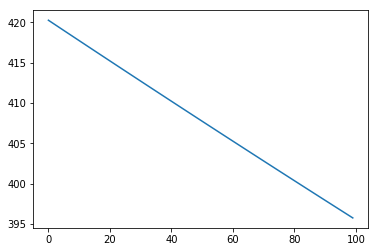

In [24]:
fig, ax = plt.subplots(1,1)
ax.plot(iterat, loss_history)

# Практика (8 + 0.5*)

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [566]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer

%matplotlib inline

В этой части вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [686]:
data = pd.read_csv('train.csv', header=0)

In [687]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [688]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [689]:
data.drop('Id', axis=1, inplace=True)

## 1 (1)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [690]:
data.isnull().any().any()

True

In [691]:
data.isnull().sum()[data.isnull().sum() >= 1]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [692]:
a = data.isnull().sum()[data.isnull().sum() >= 1] / data.shape[0]
a

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

## 2 (1)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [693]:
for i in a[a > 0.5].keys():
    data.drop(i, axis=1, inplace=True) # заполняем нулями признаи, в которых больше 50% пропусков
cat_features_mask = (data.dtypes == "object").values

In [694]:
cat_features_mask

array([False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True, False])

In [695]:
data1 = data[data.columns[~cat_features_mask]]
# для вещественных признаков заполняем пропуски средними значениеми
mis_replacer = SimpleImputer(strategy="mean")
data_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(data1), columns=data1.columns)
# для категориальных - пустыми строками
data_cat = data[data.columns[cat_features_mask]].fillna("")
data_no_mis = pd.concat([data_no_mis_real, data_cat], axis=1)

In [696]:
data_no_mis.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,Gd,Typ,,Attchd,RFn,TA,TA,Y,WD,Normal
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [697]:
data_no_mis.isnull().any().any()

False

## 3 (1)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [698]:
data_no_mis.shape

(1460, 76)

In [699]:
data_dum = pd.get_dummies(data_no_mis, drop_first=True)
print(data_dum.shape)
data_dum.columns[data_dum.dtypes == 'object']

(1460, 249)


Index([], dtype='object')

since while using label encoding there will appear different numbers in one column, the model will misunderstand the data to be in some kind of order, one-hot-encoding helps to overcome this problem

In [700]:
data_dum.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


В данном случае label encoding подходит, тк переводит категориальный признак в бинарный

## 4 (0.5)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

In [701]:
sns.set()
cp = data.corr()
cp

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


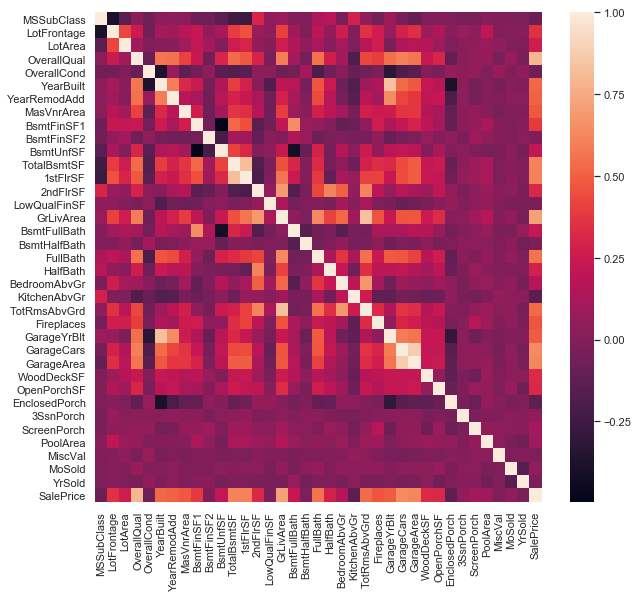

In [702]:
fig = plt.figure(figsize=(10, 9))
sns.heatmap(cp)

Как видно из графика, большая часть признаков слабо коррелирует друг с другом. При этом стоимость дома коррелирует примерно с половиной признаков (см.последнюю строчку)

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [703]:
max_corr = cp['SalePrice'][cp['SalePrice'] < 1].max()
max_corr_feature = cp['SalePrice'][cp['SalePrice'] == max_corr].keys()[0]
max_corr_feature

'OverallQual'

<function matplotlib.pyplot.show(*args, **kw)>

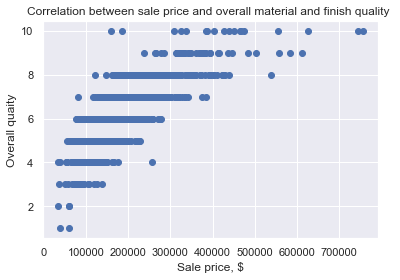

In [704]:
plt.scatter(data['SalePrice'], data[max_corr_feature])
plt.title('Correlation between sale price and overall material and finish quality ')
plt.xlabel('Sale price, $')
plt.ylabel('Overall quaity')
plt.show

In [705]:
min_corr = abs(cp['SalePrice'][cp['SalePrice'] < 1]).min()
min_corr_feature = cp['SalePrice'][abs(cp['SalePrice']) == min_corr].keys()[0]
min_corr_feature 

'BsmtFinSF2'

<function matplotlib.pyplot.show(*args, **kw)>

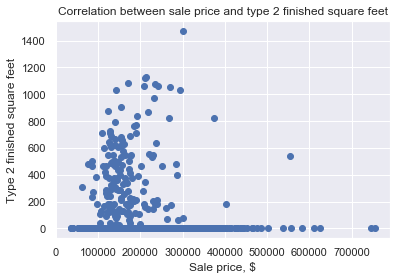

In [706]:
plt.scatter(data['SalePrice'], data[min_corr_feature])
plt.title('Correlation between sale price and type 2 finished square feet')
plt.xlabel('Sale price, $')
plt.ylabel('Type 2 finished square feet')
plt.show

## 6 (0.5)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

<function matplotlib.pyplot.show(*args, **kw)>

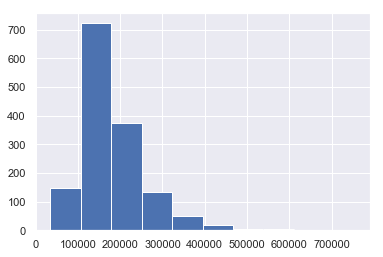

In [707]:
plt.hist(data['SalePrice'])
plt.show

In [708]:
newSalePrice = np.log1p(data['SalePrice'])

<function matplotlib.pyplot.show(*args, **kw)>

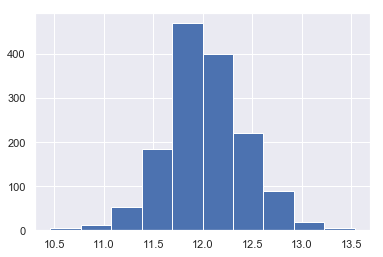

In [709]:
plt.hist(newSalePrice)
plt.show

при сравнении графиков видно, что после логарифмирования распределение цены стало ближе к нормальному, также уменьшились перепады между столбцами и сократилось расстояние между точками(ценами) на оси Ох. 

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [710]:
data = data_dum
data.columns[data.dtypes == 'object']

Index([], dtype='object')

In [711]:
X_train, X_val, y_train, y_val = train_test_split(
    data.drop('SalePrice', axis=1),
    np.log1p(data['SalePrice']),
    random_state=13
)

In [712]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 248), (365, 248), (1095,), (365,))

## 7 (2)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [713]:
def rmse(y_pred, y_true):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [595]:
# KNN
neigh = KNeighborsRegressor(n_neighbors=4, weights='distance')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_val)

In [596]:
rmse(y_pred, y_val)

0.23828720896002972

In [597]:
grid_searcher = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={
        'n_neighbors': range(1, 15, 2),
        'weights': ['uniform', 'distance'],
        'p': [2, 3]
    },
    cv=5
)
grid_searcher.fit(X_train, y_train)
y_pred_acc = grid_searcher.predict(X_val)

In [598]:
grid_searcher.best_params_

{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}

In [599]:
rmse(y_pred_acc, y_val) # RMSE KNN

0.2409816226526474

In [600]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
ypred = lr.predict(X_val)
rmse(ypred, y_val)

0.218243843836323

In [601]:
grid_lr = GridSearchCV(lr,
    param_grid={
        'fit_intercept': [True, False],
        'normalize':[True, False],
        'copy_X': [True, False],
        'n_jobs': range(-1, 20)
    },
    cv=5
)
grid_lr.fit(X_train, y_train)
y_pred_acc_lr = grid_lr.predict(X_val)

In [602]:
best_param_lr = grid_lr.best_params_
best_param_lr

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}

In [603]:
rmse(y_pred_acc_lr, y_val) # RMSE Linear Regression

0.218243843836323

In [604]:
# Lasso
lasso_params = {'alpha': [0.001, 0.01, 1], 'max_iter': [1e5, 1e7]}
grid_lasso = GridSearchCV(Lasso(normalize=True),
    param_grid=lasso_params,
    cv=5
)
grid_lasso.fit(X_train, y_train)
y_pred_acc_L = grid_lasso.predict(X_val)

In [605]:
grid_lasso.best_params_

{'alpha': 0.001, 'max_iter': 100000.0}

In [606]:
rmse(y_pred_acc_L, y_val)

0.2153820758499894

In [714]:
# Ridge
r = Ridge(alpha=2, normalize=True)
r.fit(X_train, y_train)
pred = r.predict(X_val)
rmse(pred, y_val) # RMSE Ridge

0.19503243526141

In [728]:
r_params = {'alpha': range(0, 5)}
grid_r = GridSearchCV(Ridge(normalize=True),
    param_grid=r_params,
    cv=5
)
grid_r.fit(X_train, y_train)
y_pred_acc_r = grid_r.predict(X_val)

In [729]:
grid_r.best_params_

{'alpha': 1}

In [730]:
rmse(y_pred_acc_r, y_val) # RMSE Ridge

0.19559606129004814

## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

In [294]:
# your code here
olr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
olr.fit(X_train, y_train)
predlr = olr.predict(X_val)

In [295]:
lasso = Lasso(alpha=0.001, max_iter=100000)
lasso.fit(X_train, y_train)
predlasso = lasso.predict(X_val)

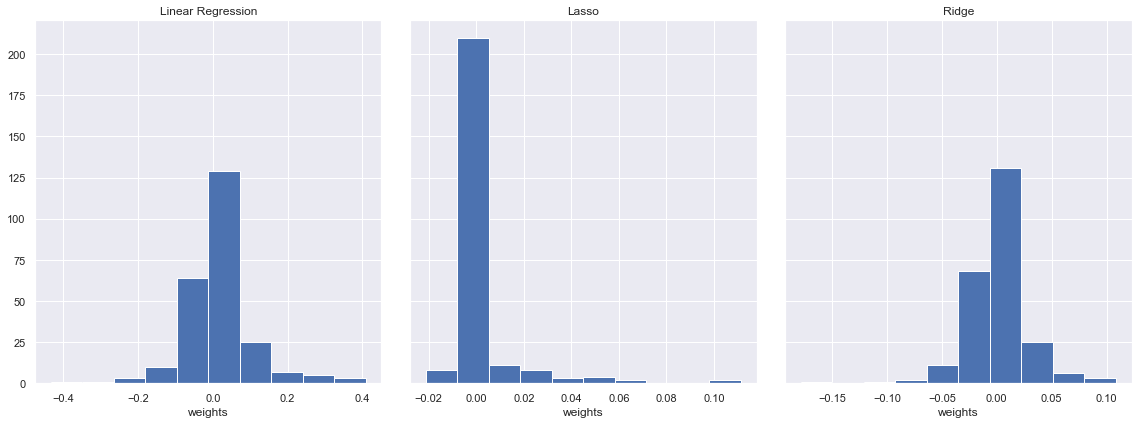

In [296]:
fig, ax = plt.subplots(1, 3, sharey='row', figsize=(16, 6))
regr = [olr, lasso, r]
titles = ['Linear Regression', 'Lasso', 'Ridge']
for i in range(3):
    ax[i].hist(regr[i].coef_)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('weights')
plt.tight_layout()

Модель содержит большое число k предикторов, многие из которых могут не оказывать влияния на значение отклика. Если исключить такие переменные из выборки, модель будет легче интерпретировать. Методы регрессии Ridge и Lasso предоставляют возможность скорректировать данный недостаток. В результате применения этих методов коэффиицент (вес) при некоторых предикторах линейной модели приближается к нулю (или становится равным нулю). Именно поэтому на графиках весов Lasso и Ridge большее количество весов находится в окрестностях нуля в отличие от Линейной регрессии. 

## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.212 на валидации по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

In [ ]:
# your code here

## 10* (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.210 на валидации по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [ ]:
получилось# your code here

# Теория (1.5*)

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

$f(C)=\rho_\tau\sum_{i=1}^l{y_i} - l\rho_\tau C$    
Функция линейно зависит от $C$, тогда рассмотрим следующие случаи:    
    1) $l\rho_\tau C < \rho_\tau\sum_{i=1}^l{y_i}$, $С \to \frac{\sum_{i=1}^l{y_i}}{l}, f \to 0$      
    2) $l\rho_\tau C > \rho_\tau\sum_{i=1}^l{y_i}$, $С \to \infty, f \to -\infty$      
    3) $l\rho_\tau C = \rho_\tau\sum_{i=1}^l{y_i} \Rightarrow C=\frac{\sum_{i=1}^l{y_i}}{l}$     
    Ответ: $C=\frac{\sum_{i=1}^l{y_i}}{l}$    

## 2* (0.5)

Алгоритм регрессии выдает константный ответ для любого объекта: $a(x) = C$. Найдите $C$, при котором средняя абсолютная ошибка на обучающей выборке $\{(x_1, y_1), \ldots, (x_\ell, y_\ell)\}$ будет минимальной.

MSE = $\frac{1}{l}\sum_{i=1}^l{|C-y_i|} \to$ min    
$\frac{1}{l}(|C-y^{(1)}|+|C-y^{(2)}|+...+|C-y^{(l)}|) \to min$     
Минимальное возможное значение в данном случае - 0, тогда посмотрим, при каком С данное выражение стремится к минимуму. Заметим, что МАЕ можно обозначить как мат.ожидание от $|C - Y|$, где $Y = (y_1, y_2, ..., y_l)$
Тогда $E(|C-Y|)=\int_{Y\in R}{|C-Y|f_Y}dY, f_Y - функция\,плотности\,случайной\,величины\,Y$    
$\int_{Y\in R}{|C-Y|f_Y}dY = \int_{-\infty}^C{(C-Y)f_Y}dY + \int_{C}^\infty{(Y-C)f_Y}dY \to min$       
SOC: $\frac{d}{dC}\int_{-\infty}^C{(C-Y)f_Y}dY + \frac{d}{dC}\int_{C}^\infty{(Y-C)f_Y}dY = 0$    
По правилу Лейбница получаем: $\frac{d}{dC}\int_{-\infty}^C{(C-Y)f_Y}dY=\int_{-\infty}^C{f_Y}dY$     
$\frac{d}{dC}\int_{C}^\infty{(Y-C)f_Y}dY =  -\int_{C}^\infty{f_Y}dY$

Тогда $\int_{-\infty}^C{f_Y}dY -\int_{C}^\infty{f_Y}dY = 0$
$\int_{-\infty}^C{f_Y}dY=\int_{C}^\infty{f_Y}dY$. Заметим что такое возможно только тогда, когда С - медиана.    
Ответ: $C=y^{(\frac{1+l}{2})}$

## 3* (0.5)

Гарри Поттер хочет найти философский камень, расположенный в точке минимума функции $f(x_1, x_2)=x_1^2 + x_2^2$. В момент времени 0 он стартует из точки $x^{(0)}=(2, 2)$. На $i$-й минуте Гарри мгновенно перемещается (аппарирует) из точки $x^{(i)}$ в точку

$$
x^{(i+1)} = x^{(i)} - \eta \nabla f(x^{(i)}),
$$

где $\nabla f(x^{(i)})$ — градиент $f$ в точке $x^{(i)}$, $\eta \ge 0$ — фиксированное число. Опишите судьбу Гарри в зависимости от значения $\eta$. При каких значениях $\eta$ Гарри подойдёт к философскому камню сколь угодно близко? Сколько итераций ему понадобится, чтобы подойти к философскому камню на расстояние не больше $\varepsilon$?

1)Точка минимума $f(x_1, x_2)=x_1^2 + x_2^2$ находится в точке $(0, 0)$    
2) $\nabla f(x_1, x_2)=(2x_1, 2x_2)$   
3) $x^{(0)}=(2, 2)$

$x^{(1)}=x^{(0)} - \eta * \nabla f(x_1, x_2)=(2, 2)-(4\eta, 4\eta)=(2(1-2\eta), 2(1-2\eta))$   
Отметим, что $x^{(i)}_1=x^{(i)}_2$, так как мы стартуем из точки (2, 2)

a)Если $\eta > 0.5, x^{(1)}=(2, 2)-(4\eta, 4\eta)=(2(1-2\eta), 2(1-2\eta)), |x^{(0)}| < |x^{(1)}|$.
Тогда можно заметить, что при $\eta>0.5 |x^{(i)}| < |x^{(i+1)}|$ . Таким образом, Гарри никогда не дойдет до философского камня.

b)Если $\eta=0.5, x^{(1)}=(2, 2)-(4\eta, 4\eta)=(2-2, 2-2)=(0,0)$. Таким образом, Гарри дойдет до философского камня всего за один шаг.

c) Если $\eta<0.5, x^{(1)}=(2, 2)-(4\eta, 4\eta)=(2(1-2\eta), 2(1-2\eta)), |x^{(0)}| > |x^{(1)}|, |x^{(i)}| > |x^{(i+1)}|$, то есть с каждым шагом Гарри будет приближаться к философскому камню, пока не окажется в его окрестностях.    
$x^{(i+1)}=(x^{(i)}, x^{(i)})-(2x^{(i)}\eta, 2x^{(i)}\eta)=(x^{(i)}(1-2\eta), x^{(i)}(1-2\eta))$     
$(x^{(i)}(1-2\eta), x^{(i)}(1-2\eta))-(x^{(i)}, x^{(i)}) = (x^{(i)}(-2\eta), x^{(i)}(-2\eta))=(-2\eta)(x^{(i)}, x^{(i)})$.     
В таком случае ему понадобится $\frac{\varepsilon}{\eta}$ итераций.     
Ответ: $\frac{\varepsilon}{\eta}$ (с округлением наверх до натурального числа) итераций